<a href="https://colab.research.google.com/github/Unfeir/DS/blob/main/lesson_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
def compute_prob(x, mu, sigma):
    return np.prod(1. / (np.sqrt(2*np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2)), axis=1)

X, y = datasets.make_blobs(n_samples=1000, random_state=8, centers=[(4, 3)])
X[:, 0] = X[:, 0] * 2.54
X[0]

mu = X.mean(axis=0)
sigma = X.std(axis=0)

y[compute_prob(X, mu, sigma) <= 0.005] = 1

In [ ]:
X

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
mu, sigma

(array([10.21165368,  3.06101326]), array([2.58989852, 0.98706522]))

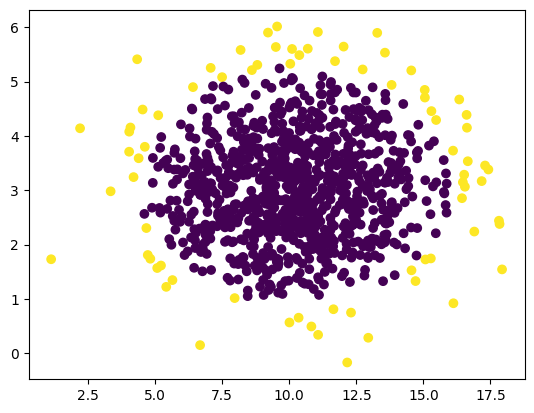

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
mu = X.mean(axis=0)
sigma = X.std(axis=0)

In [ ]:
mu, sigma

(array([10.21165368,  3.06101326]), array([2.58989852, 0.98706522]))

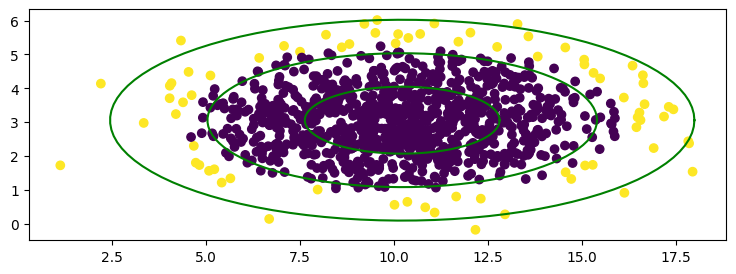

In [ ]:
plt.figure(figsize=(9, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(mu[0] + sigma[0] * np.cos(t), mu[1] + sigma[1] * np.sin(t), color="green")
plt.plot(mu[0] + 2 * sigma[0] * np.cos(t), mu[1] + 2 * sigma[1] * np.sin(t), color="green")
plt.plot(mu[0] + 3 * sigma[0] * np.cos(t), mu[1] + 3 * sigma[1] * np.sin(t), color="green")

In [ ]:
def f(x, mu, sigma):
    return np.prod(1 / ((np.sqrt(2 * np.pi)) * sigma) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)), axis=1)

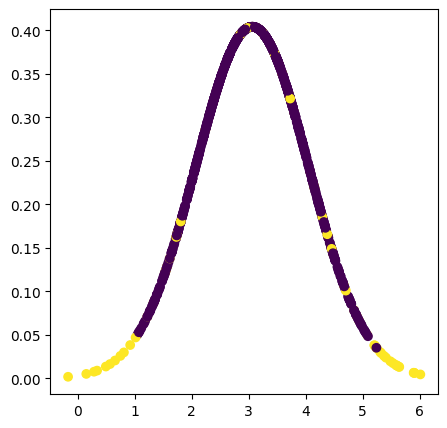

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 1], f(X[:, 1].reshape(-1, 1), mu[1], sigma[1]), c=y)

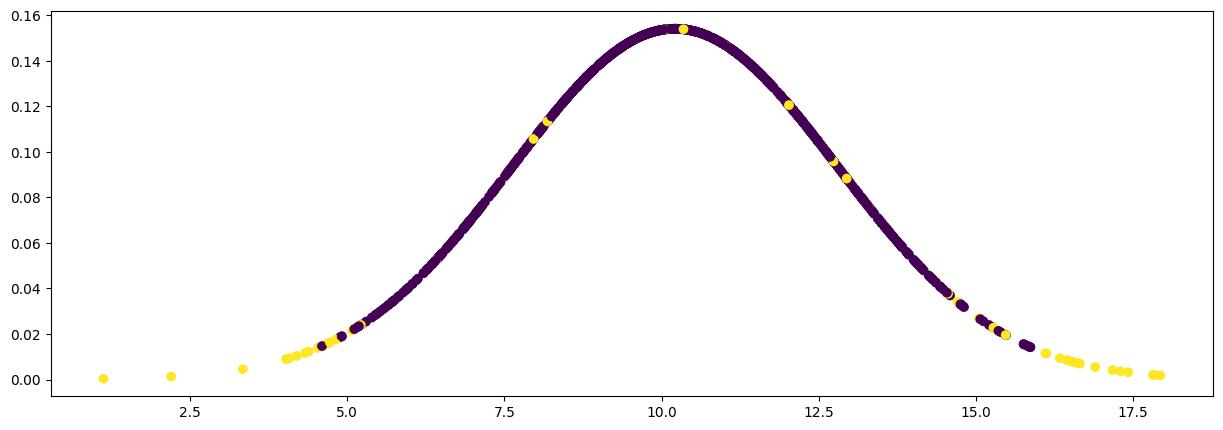

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(X[:, 0], f(X[:, 0].reshape(-1, 1), mu[0], sigma[0]), c=y)

In [ ]:
y_pred_prob = f(X, mu, sigma)

In [ ]:
y_pred_prob[y==0].min()

0.0051266823168908985

In [ ]:
y_pred_prob >= y_pred_prob[y==0].min()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
f1_score(y, (y_pred_prob < y_pred_prob[y == 0].min()).astype(int))

1.0

In [ ]:
X_0 = X[y == 0]
y_0 = y[y == 0]
X_1 = X[y == 1]
y_1 = y[y == 1]

X_0_train, X_0_valid, y_0_train, y_0_valid = train_test_split(X_0, y_0, train_size=0.6)
X_1_valid, X_1_test, y_1_valid, y_1_test = train_test_split(X_1, y_1, train_size=0.5)
X_0_valid, X_0_test, y_0_valid, y_0_test = train_test_split(X_0_valid, y_0_valid, train_size=0.5)

In [ ]:
X_train, y_train = X_0_train, y_0_train
X_valid, y_valid = np.concatenate([X_0_valid, X_1_valid]), np.concatenate([y_0_valid, y_1_valid])
X_test, y_test = np.concatenate([X_0_test, X_1_test]), np.concatenate([y_0_test, y_1_test])

In [ ]:
y_train

In [ ]:
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)

In [ ]:
mu, sigma

(array([10.09781812,  3.01249682]), array([2.28964392, 0.87767599]))

In [ ]:
y_valid_prob = f(X_valid, mu, sigma)

In [ ]:
y_valid_prob

In [ ]:
scores = []
for epsilon in np.linspace(0, 0.01, 20):
    score = f1_score(y_valid, y_valid_prob < epsilon)
    scores.append(score)
    print(f"{epsilon=:.5f} {score=:.3f}")

epsilon=0.00000 score=0.000
epsilon=0.00053 score=0.318
epsilon=0.00105 score=0.549
epsilon=0.00158 score=0.630
epsilon=0.00211 score=0.844
epsilon=0.00263 score=0.912
epsilon=0.00316 score=0.972
epsilon=0.00368 score=0.935
epsilon=0.00421 score=0.937
epsilon=0.00474 score=0.925
epsilon=0.00526 score=0.902
epsilon=0.00579 score=0.892
epsilon=0.00632 score=0.881
epsilon=0.00684 score=0.860
epsilon=0.00737 score=0.831
epsilon=0.00789 score=0.813
epsilon=0.00842 score=0.787
epsilon=0.00895 score=0.771
epsilon=0.00947 score=0.755
epsilon=0.01000 score=0.740


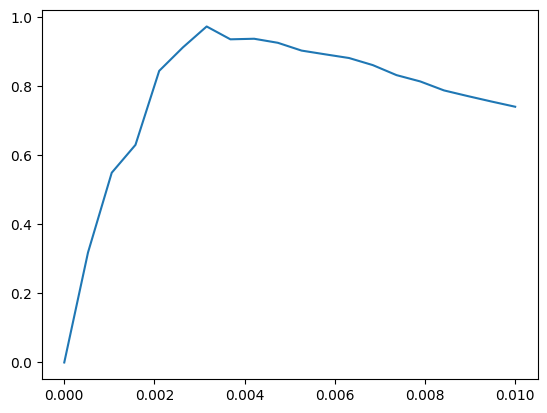

In [ ]:
plt.plot(np.linspace(0, 0.01, 20), scores)

In [ ]:
epsilon = 0.00316

In [ ]:
f1_score(y_test, f(X_test, mu, sigma) < epsilon)

0.9870129870129869